# Data fetching and understand the train/val/test splits

In [1]:
import pandas as  pd
import h5py

C:\Users\Balajisri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f1 = h5py.File('SVHN_single_grey1.h5', 'r')
print(list(f1.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [23]:
X_train = f1['X_train'][:]
print("X_train Shape -",X_train.shape)

y_train = f1['y_train'][:]
print("y_train Shape -", y_train.shape)

X_val = f1['X_val'][:]
print("X_val Shape -", X_val.shape)

y_val = f1['y_val'][:]
print("y_val Shape -", y_val.shape)

X_test = f1['X_test'][:]
print("X_test Shape -", X_test.shape)

y_test = f1['y_test'][:]
print("y_test Shape -", y_test.shape)

X_train Shape - (42000, 32, 32)
y_train Shape - (42000,)
X_val Shape - (60000, 32, 32)
y_val Shape - (60000,)
X_test Shape - (18000, 32, 32)
y_test Shape - (18000,)


We have totally 3 set of data like train, validate and test with 42000, 60000 and 18000 accordingly. dataset has the shape of 32x32

# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier

Converting the image dataset in format which can used to KNN classifier

In [4]:
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test_2d = X_test.reshape((nsamples,nx*ny))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_2d, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [6]:
pred = neigh.predict(X_test_2d)

# Print the classification metric report

In [7]:

from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.68      0.53      1814
           1       0.46      0.74      0.56      1828
           2       0.58      0.55      0.57      1803
           3       0.42      0.42      0.42      1719
           4       0.65      0.64      0.64      1812
           5       0.49      0.38      0.43      1768
           6       0.49      0.41      0.45      1832
           7       0.73      0.60      0.66      1808
           8       0.46      0.35      0.40      1812
           9       0.56      0.40      0.46      1804

   micro avg       0.52      0.52      0.52     18000
   macro avg       0.53      0.52      0.51     18000
weighted avg       0.53      0.52      0.51     18000



Seems like KNN model has accuracy around 50% with K = 10.

# Implement and apply a deep neural network classifier including

In [4]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Reshape, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [19]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Understand and be able to implement (vectorized) backpropagation 
# Implement batch normalization for training the neural network

In [20]:
mnist_model = Sequential()
mnist_model.add(Reshape((1024,),input_shape=(32,32,)))
mnist_model.add(BatchNormalization())
mnist_model.add(Dense(100, activation='relu'))
mnist_model.add(BatchNormalization())
mnist_model.add(Dropout(0.25))
mnist_model.add(Dense(10, activation='softmax'))
mnist_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 1,043,106
Trainable params: 1,039,058
Non-trainable params: 4,048
______________________________________________________________

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
mnist_model.fit(X_train,y_train,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32, callbacks=[early_stopping])

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 7s 159us/step - loss: 2.0012 - acc: 0.3755 - val_loss: 1.3153 - val_acc: 0.5861
Epoch 2/50
42000/42000 [==============================] - 6s 146us/step - loss: 1.4001 - acc: 0.5490 - val_loss: 0.9172 - val_acc: 0.7307
Epoch 3/50
42000/42000 [==============================] - 6s 146us/step - loss: 1.2342 - acc: 0.6013 - val_loss: 0.8355 - val_acc: 0.7533
Epoch 4/50
42000/42000 [==============================] - 6s 147us/step - loss: 1.1473 - acc: 0.6351 - val_loss: 0.8046 - val_acc: 0.7619
Epoch 5/50
42000/42000 [==============================] - 6s 147us/step - loss: 1.0734 - acc: 0.6587 - val_loss: 0.7160 - val_acc: 0.7938
Epoch 6/50
42000/42000 [==============================] - 6s 147us/step - loss: 1.0298 - acc: 0.6761 - val_loss: 0.6787 - val_acc: 0.8063
Epoch 7/50
42000/42000 [==============================] - 6s 146us/step - loss: 0.9838 - acc: 0.6904 - val_loss: 0.6682 - 

In [10]:
pred = mnist_model.predict_classes(X_test)
pred

array([0, 7, 2, ..., 7, 9, 2], dtype=int64)

In [11]:
y_test.shape

(18000, 10)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1630,   36,    6,   18,   14,    3,   23,   25,   20,   39],
       [  40, 1607,   13,   24,   50,    7,   10,   42,   22,   13],
       [  24,   52, 1511,   26,   24,   13,    1,   69,   29,   54],
       [  23,   40,   31, 1338,   17,  143,   12,   29,   51,   35],
       [  31,   65,   26,   12, 1564,   21,   17,   11,   15,   50],
       [  17,   28,   14,   66,   11, 1476,   52,   10,   49,   45],
       [  63,   31,   12,   26,   32,   72, 1460,   12,  106,   18],
       [  30,   83,   32,   13,   13,    6,    7, 1587,   18,   19],
       [  37,   52,   22,   38,   21,   40,   91,   11, 1431,   69],
       [  65,   40,   24,   40,   17,   34,   17,   19,   50, 1498]],
      dtype=int64)

In [17]:
names = np.unique(y_test)

In [24]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1814
           1       0.79      0.88      0.83      1828
           2       0.89      0.84      0.86      1803
           3       0.84      0.78      0.81      1719
           4       0.89      0.86      0.87      1812
           5       0.81      0.83      0.82      1768
           6       0.86      0.80      0.83      1832
           7       0.87      0.88      0.88      1808
           8       0.80      0.79      0.79      1812
           9       0.81      0.83      0.82      1804

   micro avg       0.84      0.84      0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



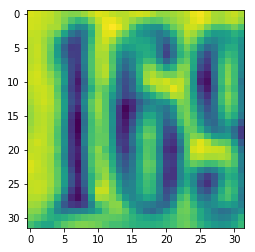

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[609])

In [20]:
mnist_model.predict_classes(np.reshape(X_test[609],(-1,32,32)))

array([6], dtype=int64)

# Conclusion

Neural Network performance well when compared with tradition machine learning model - KNN. 

Accuracy: 
 - KNN has the accuracy around 50%
 - Neural Network has the accuracy around 85%

Also KNN model is slow while predicting when compared but Neural network is fast and more accurate.